In [1]:
function plot_function(interval,fun)
    a=interval(1);
    b=interval(2);
    x=linspace(a,b,100);
    y1=feval(fun,x);
    hold on;
    plot(x,y1,"linewidth",10);
    plot(x,zeros(length(x)),'b');
    set(gca, "linewidth", 4, "fontsize", 12)
    set(gca, 'XTick', floor(a)-3:floor(b)+3)
endfunction

function draw_vertical_lines(a,b)
    limits = axis ();
    line([a(1),a(1)], [0,a(2)],"linewidth",10, "color", "blue")
    line([b(1),b(1)], [0,b(2)],"linewidth",10, "color", "blue")
endfunction

function draw_trapezoid(a,b)
    limits = axis ();
    line([a(1),a(1)], [0,a(2)],"linewidth",10, "color", "red")
    line([b(1),b(1)], [0,b(2)],"linewidth",10, "color", "red")
    line([a(1),b(1)], [a(2),b(2)],"linewidth",10, "color", "red")
endfunction

function draw_trapezoids(a,b,fun,n)
    plot_function([a-1,b+1],fun)
    x=linspace(a,b,n+1);
    for i=1:length(x)-1
        draw_trapezoid([x(i),feval(fun,x(i))],[x(i+1),feval(fun,x(i+1))])
    end
endfunction

function draw_simpson(a,b,fun)
    x=linspace(a,b,3);
    y=fun(x);
    p=linterp(x,y);
    plot_function([a-1,b+1],fun);
    draw_vertical_lines([a,fun(a)],[b,fun(b)]);
    c=(a+b)/2;
    draw_vertical_lines([c,fun(c)],[c,fun(c)]);
    hold on;
    xp=linspace(a,b,100);
    plot(xp,polyval(p,xp),"linewidth",14,"color", "red");
    plot([a,c,b],[fun(a),fun(c),fun(b)],'o','markersize', 14,'markerfacecolor','g')
endfunction

function draw_simpsons(a,b,fun,n)
    plot_function([a-1,b+1],fun);
    draw_vertical_lines([a,fun(a)],[b,fun(b)]);
    hold on;
    points=linspace(a,b,3*n-1);
    I=0;
    for i=1:2:length(points)-2
        x=[points(i),points(i+1),points(i+2)];
        y=fun(x);
        p=linterp(x,y);
        xp=linspace(points(i),points(i+2),50);
        plot(xp,polyval(p,xp),"linewidth",14,"color", "red");
        draw_vertical_lines([points(i),fun(points(i))],[points(i),fun(points(i))]);
        draw_vertical_lines([points(i+1),fun(points(i+1))],[points(i+1),fun(points(i+1))]);
        draw_vertical_lines([points(i+2),fun(points(i+2))],[points(i+2),fun(points(i+2))]);
    end
endfunction

function [errors,sub_intervals]=calculate_error(a,b,fun,correct_solution,max_num_of_reps,method)
    errors=zeros(1,max_num_of_reps);
    sub_intervals=zeros(1,max_num_of_reps);
    for i=1:max_num_of_reps
        I=feval(method,a,b,fun,i);
        errors(i)=abs(I-correct_solution);
        if strcmp (method, 'trapez_kompozitno')
            sub_intervals(i)=(b-a)/i;
        else
            sub_intervals(i)=(b-a)/(3*i-1);
        end
    end
    
    plot(1:max_num_of_reps,errors,"linewidth",10);
    xlabel('Broj primena metoda');
    ylabel('Greska');
    set(gca, "fontsize", 18);
endfunction

# Numerička integracija

#### Pomoću numeričke integracije možemo da odredimo određeni integral proizvoljne funkcije.
#### Određeni integral predstavlja površinu figure ispod date funkcije na zadatom zatvorenom intervalu.
#### Na primer, na sledećoj slici određeni integral
#### $$\int_{2}^{6}2^xdx$$ je površina figure ispod funkcije $f(x)=2^x$ na zatvorenom intervalu [2,6].

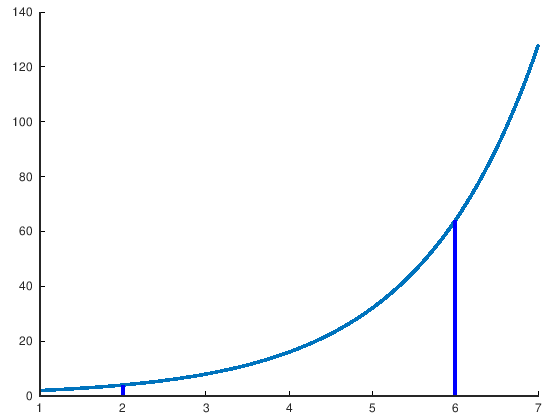

In [2]:
plot_function([1,7],@(x)2.^x)
draw_vertical_lines([2,2^2],[6,2^6])

#### Sve numeričke metode za integraciju imaju za cilj da procene površinu figure ispod funkcije.
#### Metode se razlikuju po načinu na koji se procena površine vrši.

## Njutn-Kotesove metode

#### Kod Njutn-Kotesovih metoda koristimo interpolaciju da funkciju aproksimiramo polinomom.
#### Nakon toga izračunavamo određeni itegral polinoma.
#### Rezultat intregacije polinoma smatramo rezultatom integracije funkcije. 
#### Pošto je polinom aproksimacija funkcije, rezultat će biti aproksimacija tačne vrednosti određenog integrala funkcije.
#### U nastavku ćemo pokazati na koji način određujemo određeni intregal polinoma i koliko takvom aroksimacijom gubimo na tačnosti.

### Metod trapeza

#### Kod ovog metoda koristimo linearnu interpolaciju da aproksimiramo funkciju.
#### Na taj način dobijamo funkciju aproksimiramo trapezom, kao na sledećoj slici.

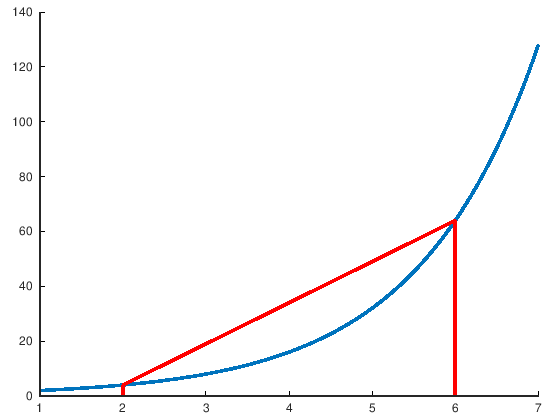

In [3]:
plot_function([1,7],@(x)2.^x)
draw_vertical_lines([2,2^2],[6,2^6])
draw_trapezoid([2,2^2],[6,2^6])

#### Još uvek nismo rekli na koji način određujemo integral polinoma, u ovom slučaju prave.
#### Određeni integrali polinoma kod Njutn-Kotesovih metoda izračunavamo analitički.
#### Rezultat analitičke integracije biće formula koja će u stvari predstavljati metod trapeza.
#### U nastavku prikazujemo izvođenje formule za metod trapeza.
#### Data nam je proizvoljna funkcija $f(x)$ i interval $[a,b]$. Cilj nam je da izračunamo određeni integral:
#### $$I=\int_{a}^{b}f(x)dx$$
#### Prvo aproksimiramo funkciju $f(x)$ na intervalu $[a,b]$ pomoću prave kroz tačke $(a,f(a))$ i $(a,f(a))$ (kao na slici iznad).
#### Pravu možemo recimo da odredimo pomoću Lagranžovog polinoma:
#### $$p(x)=\frac{x-b}{a-b}f(a)+\frac{x-a}{b-a}f(b)$$
#### Rešavmo sada integral:
#### $$I_p=\int_{a}^{b}p(x)dx$$ 
#### analitički.
#### $$I_p=\int_{a}^{b}p(x)dx=\int_{a}^{b}\frac{x-b}{a-b}f(a)+\int_{a}^{b}\frac{x-a}{b-a}f(b)dx$$
#### $$\int_{a}^{b}(x-b)dx=\int_{a}^{b}xdx-b\int_{a}^{b}dx=\frac{b^2}{2}-\frac{a^2}{2}-b(b-a)=\frac{b^2-a^2-2b^2+2ab}{2}=\frac{-a^2+2ab-b^2}{2}=-\frac{a^2-2ab+b^2}{2}=-\frac{(a-b)^2}{2}$$
#### $$\int_{a}^{b}(x-a)dx=\int_{a}^{b}xdx-a\int_{a}^{b}dx=\frac{b^2}{2}-\frac{a^2}{2}-a(b-a)=\frac{b^2-a^2-2ab+2a^2}{2}=\frac{a^2-2ab+b^2}{2}=\frac{(a-b)^2}{2}$$
#### $$I_p=\int_{a}^{b}p(x)dx=-\frac{f(a)}{a-b}\frac{(a-b)^2}{2}-\frac{f(b)}{a-b}\frac{(a-b)^2}{2}=\frac{(-f(a)-f(b))(a-b)^2}{2(a-b)}=\frac{-(f(a)+f(b))(a-b)}{2}=(b-a)\frac{f(a)+f(b)}{2}$$
#### Dakle, ako koristimo metod trapeza određeni integral funkcije $f(x)$ na zatvorenom intervalu $[a,b]$ aproksimiramo sa:
#### $$I=\int_{a}^{b}f(x)dx\approx(b-a)\frac{f(a)+f(b)}{2}$$
#### Ako se iz geometrije podsetimo da je površina trapeza: srednja linija * visina. Vidimo da smo mi u stvari izveli formulu za površinu trapeza (visina je $b-a$, a srednja linija $\frac{f(a)+f(b)}{2}).$
#### Primer: Primenićemo sada metodu trapeza da rešimo integral:
#### $$I=\int_{2}^{6}2^xdx$$
#### Imamo da je $a=2$,$b=6$,$f(x)=2^x$. Primenjujemo metod:
#### $$I\approx(b-a)\frac{f(a)+f(b)}{2}=(6-2)\frac{f(2)+f(6)}{2}=2(2^2+2^6)=136$$
#### Proverićemo sada koliko smo pogrešili. Analitičko rešenje je:
#### $$I=\int_{2}^{6}2^xdx=\frac{2^x}{ln(2)}\Biggr|_{2}^{6}=86.56170$$
#### U naredne dve linije koda računamo grešku i relativnu grešku.

In [4]:
greska=135-86.5
relativna_greska=(135-86.5)/86.5

greska =  48.500
relativna_greska =  0.56069


#### Vidimo da smo pogrešili za 56% što je dosta velika greška. Razlog za to je očigledan ako pogledamo sliku iznad.
#### Između površine trapeza i figure ispod funkcije postoji dosta velika razlika.
#### Dakle, osim ako ne tražimo integral prave, metod trapeza rezultovaće greškom.
#### Pre nego što pokažemo kako ćemo poboljšati tačnost metoda trapeza, napisaćemo kod za metod.

In [5]:
function I=trapez(a,b,funkcija)
    I=(b-a)/2*(feval(funkcija,a)+feval(funkcija,b));
endfunction

In [6]:
I = trapez(2,6,@(x)2.^x)

I =  136


#### Hajde da vidimo šta bi dobili ako umesto jednog trapeza koristmo dva trapeza.

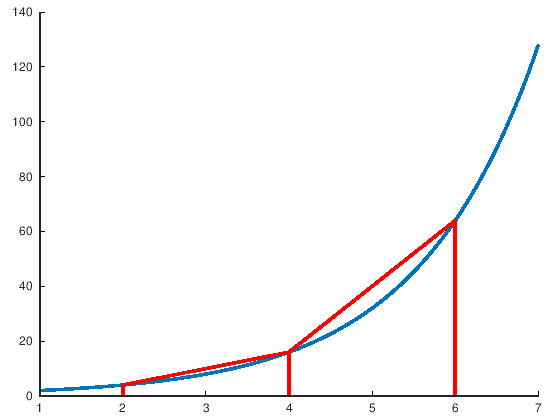

In [7]:
draw_trapezoids(2,6,@(x)2.^x,2)

In [8]:
I = trapez(2,4,@(x)2.^x) + trapez(4,6,@(x)2.^x)

I =  100


#### Hajde da probamo sa četiri trapeza.

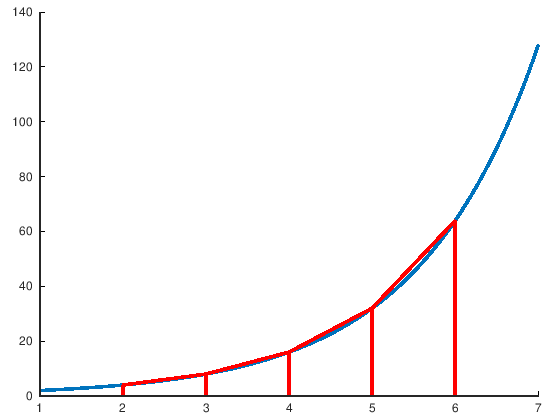

In [8]:
draw_trapezoids(2,6,@(x)2.^x,4)

In [9]:
points=linspace(2,6,5)
I=0;
for i=1:length(points)-1
    I=I+trapez(points(i),points(i+1),@(x)2.^x);
end
I

points =

   2   3   4   5   6

I =  90


#### Vidimo da kako povećavamo broj trapeza, tako se približavamo sve više tačnom rešenju.
#### Ako pogledamo slike sa 2 i 4 trapeza vidimo da trapezi manje veličine bolje aproksimiraju funkciju i da zbir površina manjih trapeza mnogo bolje aproksimira površinu figure ispod funkcije nego jedan trapez.

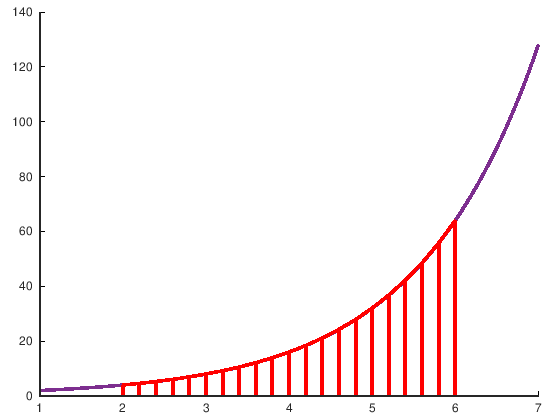

In [10]:
plot_function([1,7],@(x)2.^x)
draw_vertical_lines([2,2^2],[6,2^6])
draw_trapezoids(2,6,@(x)2.^x,20)

### Kompozitna metoda trapeza
#### Formalan naziv za postupak koji smo primenili je kompozitna metoda trapeza jer smo površinu figure "složili" iz više delova.
#### Napisaćemo sada kod za kompozitnu metodu trapeza.
#### Ulazni parametar $n$ predstavlja broj trapeza koji želimo.

In [11]:
function I=trapez_kompozitno(a,b,funkcija,n)
    points=linspace(a,b,n+1);
    I=0;
    for i=1:length(points)-1
        I=I+trapez(points(i),points(i+1),funkcija);
    end
endfunction

In [12]:
I = trapez_kompozitno(2,6,@(x)2.^x,2)

I =  100


### Red greške metode trapeza

#### U literaturi greška metode trapeza tipično se opisuje preko vrednosti $h$ koja predstavlja dužinu jednog pod-intervala na koje delimo interval $[a,b]$ da bi dobili određeni broj trapeza:
#### $$h=\frac{b-a}{n}$$
#### gde je $n$ broj trapeza. Greška metode trapeza označava sa:
#### $$O(h^2)$$
#### i kaže se da je greška metode trapeza reda $h^2$. (Kompletan postupak za određivanje greške metode trapeza dat je u udžbeniku.)
#### To znači da se za male vrednosti $h$, tj. veliki broj trapeza, greška ponaša kao funkcija $f(h)=h^2$.
#### Funkcija koju pozivamo u sledećem redu prikazuje grešku za broj primena metoda redom od $1$ do $2^7$ za $I=\int_{2}^{6}2^xdx$.

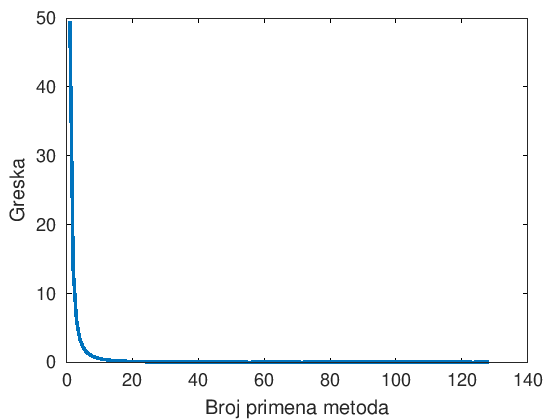

In [13]:
[errors,sub_intervals]=calculate_error(2,6,@(x)2.^x,86.56170,2^7,'trapez_kompozitno');

#### Prethodni grafik nije baš pregledan jer greška na početku ima velike vrednosti, a kasnije jako male, pa prelazimo na logaritamsku skalu (prikazujemo log10 od greške).

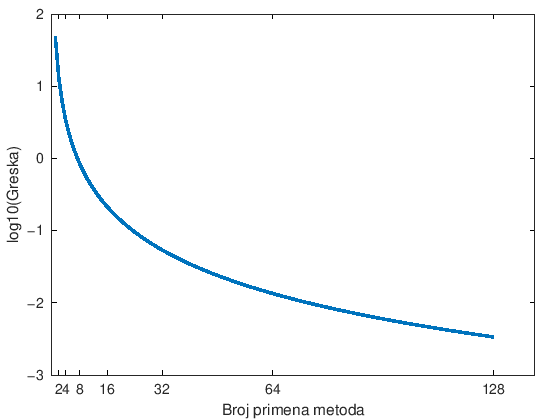

In [14]:
plot(1:length(errors),log10(errors),"linewidth",10)
xlabel('Broj primena metoda');
ylabel('log10(Greska)');
xticks=[];
for i=1:7
    xticks(i)=2^i;
end
set(gca, 'xtick', xticks)
set(gca, "fontsize", 14)

#### Uporedićemo sada grafik greške (označeno plavom) sa fukcijom $f(h)=h^2$ gde je $h$ dužina pod-intervala (označeno crvenom)

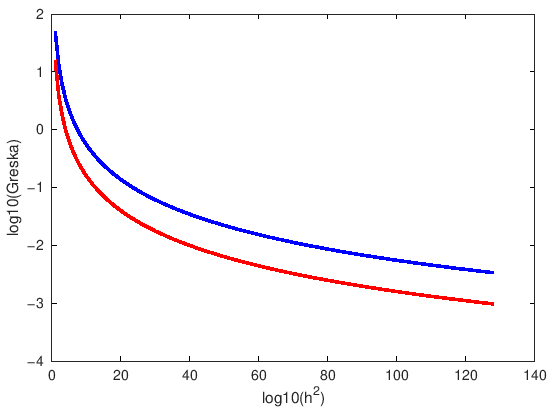

In [16]:
plot(1:length(errors),log10(errors),"linewidth",10,"color","blue")
hold on;
plot(1:length(sub_intervals),log10(sub_intervals.^2),"linewidth",10,"color", "red")
xlabel('log10(h^2)');
ylabel('log10(Greska)');
set(gca, "fontsize", 14)

#### Vidimo da postoji jako veliko podudaranje grafika, iz čega se može zaključiti da odnos između greške i kvadrata veličine pod-intervala stoji.
#### Poznavanje reda greške metoda trapeza omogućava nam da uradimo sledeću procenu:
#### $$greška(h)=h^2\\greška(\frac{h}{2})=(\frac{h}{2})^2=(\frac{1}{2})^2h^2=\frac{1}{4}h^2=\frac{1}{4}greška(h)\\greška(\frac{h}{2})=\frac{1}{4}greška(h)$$
#### To znači da ako prepolovimo veličinu pod-intervala, tj. dupliramo broj primena metoda trapeza, greška se smanji 4 puta.

In [17]:
[errors(1) errors(2) errors(4)]
[errors(1) errors(1)/4 errors(1)/16]
[errors(1) errors(1)/4 errors(2)/4]

ans =

   49.4383   13.4383    3.4383

ans =

   49.4383   12.3596    3.0899

ans =

   49.4383   12.3596    3.3596



### Simpsonov 1/3 metod
#### Takođe Njutn-Kotesov metod.
#### U ovom slučaju funkciju aproksimiramo polinomom drugog stepana na intervalu $[a,b]$.
#### Pošto koristimo polinom drugog stepena, treba nam tri tačke. Za treću tačku uzimamo sredinu intervala:
### $$c=\frac{a+b}{2}$$
#### U nastavku koristimo Lagranžovu interpolaciju sa prošlog predavanja da aproksimiramo funkciju $2^x$ na intervalu $[2,6]$. Aproksimaciju radimo u tačkama 2, 4, 6.

In [18]:
function p=linterp(x,y)
    n=length(x);
    p = 0;
    for i=1:n
        L=1;
        for j=1:n
            if i~=j
                L = conv(L,[1 -x(j)]/(x(i)-x(j)));
            end
        end
        p = p + y(i)*L;
    end
endfunction

In [19]:
a=2;b=6;
x=linspace(a,b,3)
fun=@(x)2.^x;
y=fun(x);
p=linterp(x,y)
polyout(p,'x')

x =

   2   4   6

p =

    4.5000  -21.0000   28.0000

4.5*x^2 - 21*x^1 + 28


#### Dobili smo interpolacioni polinom, koji onda prikazujemo na sledećem grafiku. Označen je crvenom bojom.

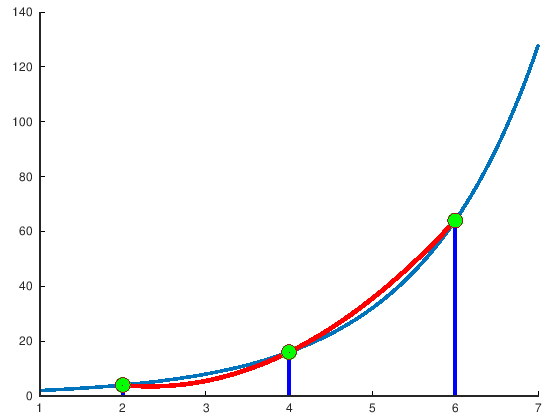

In [20]:
draw_simpson(2,6,@(x)2.^x)

#### Vidimo da je polinom dosta sličan funkciji na intervalu [2,6]. Nakon što objasnimo metod, proverićemo kolika je greška baš na ovom primeru.
#### Metod ilustrujemo i na primeru funkcije $f(x)=x-cos(2x)$ kako bi pokazali da upotreba kvaradnog polinoma umesto prave jeste bolja, ali da greška još uvek postoji.

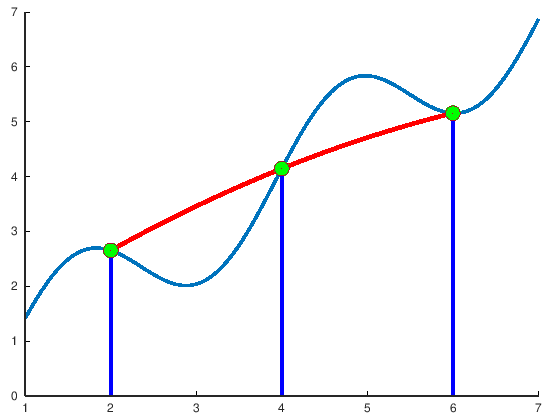

In [21]:
draw_simpson(2,6,@(x)x-cos(2.*x))

#### Pokazaćemo sada formulu za Simpsonov 1/3 metod.
#### Rešavamo analitički integral kvadragnog interpolaciono polinoma na intervalu $[a,b]$
#### $$I=\int_{a}^{b}f(x)dx$$
#### $$c=\frac{a+b}{2}$$
#### $$p(x)=\frac{(x-b)(x-c)}{(a-b)(a-c)}f(a)+\frac{(x-a)(x-c)}{(b-a)(b-c)}f(b)+\frac{(x-b)(x-a)}{(c-b)(c-a)}f(c)$$
#### Rešavmo sada integral:
#### $$I_p=\int_{a}^{b}p(x)dx$$ analitički.
#### Postupak rešavanja dat je u udžbeniku, dok ovde samo dajemo rezultat, tj. formulu za Simpsonovu 1/3 metodu:
#### $$I=\int_{a}^{b}f(x)dx\approx\frac{b-a}{6}(f(a)+4f(c)+f(b))\\c=\frac{a+b}{2}$$

#### U nastavku je prikazan kod za Simpsonovu 1/3 metodu.

In [22]:
function I=simpson(a,b,funkcija)
    c=(a+b)/2;
    I=(b-a)/6*(feval(funkcija,a)+4*feval(funkcija,c)+feval(funkcija,b));
endfunction

#### Poredimo sada Simpsonovu 1/3 metodu sa metodom trapeza na primerima funkcija $f(x)=2^x$ i $f(x)=x-cos(2x)$

In [29]:
I_trapez = trapez(2,6,@(x)2.^x)
I_simpson = simpson(2,6,@(x)2.^x)

I_trapez =  136
I_simpson =  88


In [30]:
tacno_resenje = 86.56170

tacno_resenje =  86.562


In [31]:
abs(tacno_resenje-I_simpson)/tacno_resenje
abs(tacno_resenje-I_trapez)/tacno_resenje

ans =  0.016616
ans =  0.57113


In [32]:
I_trapez = trapez(2,6,@(x)x-cos(2.*x))
I_simpson = simpson(2,6,@(x)x-cos(2.*x))

I_trapez =  15.620
I_simpson =  16.261


In [33]:
tacno_resenje = 15.88988521134625

tacno_resenje =  15.890


In [34]:
abs(tacno_resenje-I_simpson)/tacno_resenje
abs(tacno_resenje-I_trapez)/tacno_resenje

ans =  0.023368
ans =  0.017011


#### Vidimo da za prvi primer postoji velika razlika između grešaka u korist Simpsonove 1/3 metode, dok je za drugi primer razlika manja i u korist metode trapeza. Razlike su takve jer imamo samo jednu primenu funkcije, a sam oblik funkcije tada ima veliki značaj. Na primer, funkcija $f(x)=2^x$ veoma liči na kvadratni polinom na intervalu [2,6].
#### Simpsonov metod koristi finiju interpolaciju od metoda trapeza i ima bolju tačnost, što ćemo i demonstrirati poređenjem kompozitnih metoda.
#### Prvo pišemo kod za Simpsonov 1/3 metod. Za $n$ primena metoda, na intervalu $[a,b]$ formiramo ukupno $n+1$ ekvidistantnih tačaka (tu računamo i krajnje tačke) i onda uzimamo po tri tačke i primenjujemo metod na njih.
#### Na primer, za $[2,6]$ i $n=2$ tri tačke su: $2, 4, 6$. Metod primenimo onda na $[2,4]$ i $[4,6]$ i to saberemo. Sama primena metoda na npr. $[2,4]$ kreiraće srednju tačku $3$ i primeniti formulu.

In [35]:
function I=simpson_kompozitno(a,b,funkcija,n)
    parts=linspace(a,b,n+1);
    I=0;
    for i=1:length(parts)-1
        I=I+simpson(parts(i),parts(i+1),funkcija);
    end
endfunction

In [36]:
I_simpson_kom = simpson_kompozitno(2,6,@(x)2.^x,2)
I_trapez_kom = trapez_kompozitno(2,6,@(x)2.^x,2)

I_simpson_kom =  86.667
I_trapez_kom =  100


In [37]:
tacno_resenje = 86.56170
abs(tacno_resenje-I_simpson_kom)/tacno_resenje
abs(tacno_resenje-I_trapez_kom)/tacno_resenje

tacno_resenje =  86.562
ans =  0.0012126
ans =  0.15525


#### Vidimo da samo dve primene Simpsonovog metoda rezultuju greškom od 0.1% za primer $f(x)=2^x$
#### Sa sledećeg grafika može se videti poklapanje $f(x)=2^x$ i dve primene Simpsonovog 1/3 metoda.

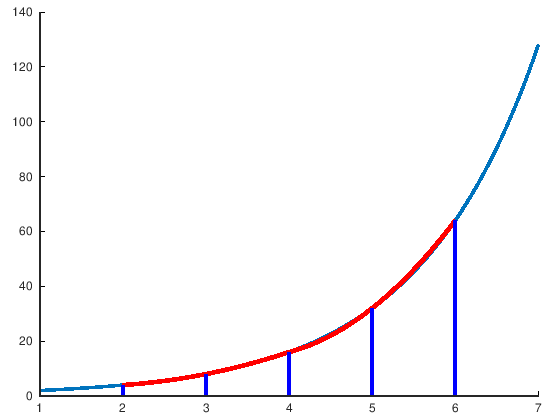

In [38]:
draw_simpsons(2,6,@(x)2.^x,2)

#### Poredimo sada kompozitne metode na primeru $f(x)=x-cos(2x)$

In [39]:
I_simpson_kom = simpson_kompozitno(2,6,@(x)x-cos(2.*x),2)
I_trapez_kom = trapez_kompozitno(2,6,@(x)x-cos(2.*x),2)

I_simpson_kom =  15.872
I_trapez_kom =  16.101


In [40]:
tacno_resenje = 15.88988521134625
abs(tacno_resenje-I_simpson_kom)/tacno_resenje
abs(tacno_resenje-I_trapez_kom)/tacno_resenje

tacno_resenje =  15.890
ans =  0.0011173
ans =  0.013273


#### Vidimo da samo dve primene Simpsonovog metoda i u ovom slučaju rezultuju greškom od 0.1%, dok je greška kompozitne metode trapeza 2%.
#### Pokazaćemo sada i grafičko poređenje.

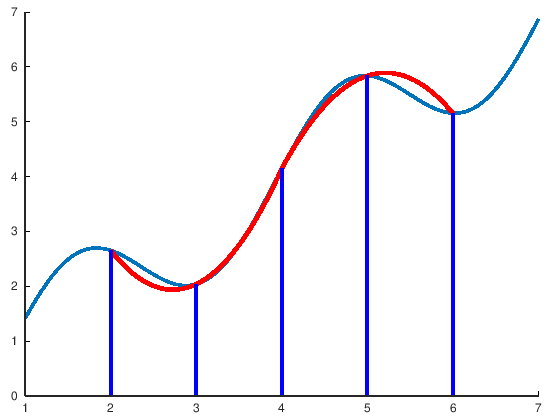

In [41]:
draw_simpsons(2,6,@(x)x-cos(2.*x),2)

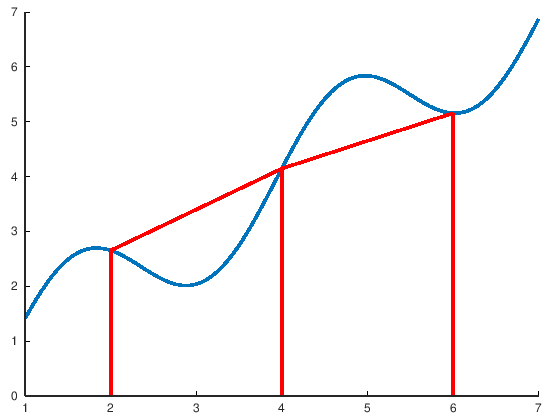

In [42]:
draw_trapezoids(2,6,@(x)x-cos(2.*x),2)

### Red greške Simpsonog 1/3 metoda.
#### Simpsonov 1/3 metod ima red greške:
#### $$O(h^4)$$
#### gde je $h$ veličina pod-intervala.
#### Kod Simpsonovog 1/3 metoda kada dupliramo broj primena, tj. $h$ podelimo sa 2, greška se smanji 16 puta:
#### $$greška(h)=h^4\\greška(\frac{h}{2})=(\frac{h}{2})^4=(\frac{1}{2})^4h^4=\frac{1}{16}h^4=\frac{1}{16}greška(h)\\greška(\frac{h}{2})=\frac{1}{16}greška(h)$$
#### Funkcija koju pozivamo u sledećem redu prikazuje grešku za broj primena metoda redom od $1$ do $2^5$ za $I=\int_{2}^{6}2^xdx$.

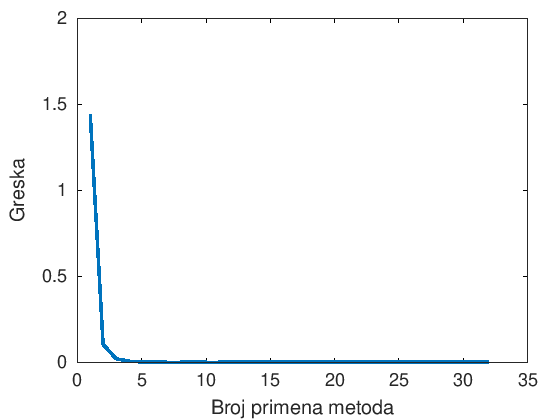

In [43]:
[errors,sub_intervals]=calculate_error(2,6,@(x)2.^x,86.56170,2^5,'simpson_kompozitno');

#### Prelazimo na lograritamsku skalu.

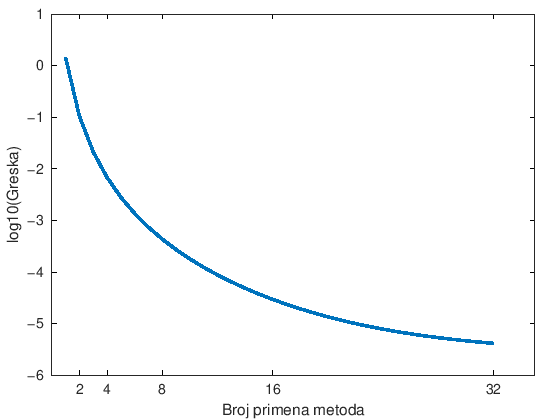

In [44]:
plot(1:length(errors),log10(errors),"linewidth",10)
xlabel('Broj primena metoda');
ylabel('log10(Greska)');
xticks=[];
for i=1:7
    xticks(i)=2^i;
end
set(gca, 'xtick', xticks)
set(gca, "fontsize", 14)

#### Uporedićemo sada grafik greške (označeno plavom) fukcijom $f(h)=h^4$ gde je $h$ dužina pod-intervala (označeno crvenom).

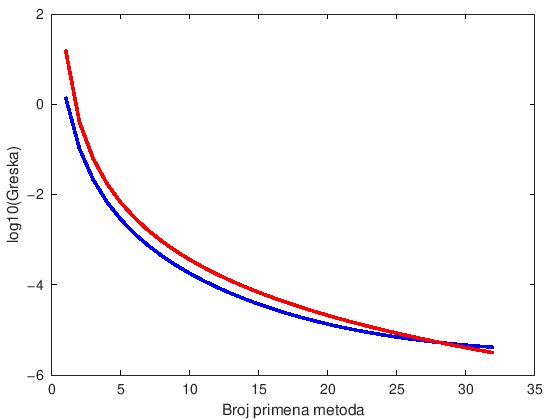

In [45]:
plot(1:length(errors),log10(errors),"linewidth",10,"color","blue")
hold on;
plot(1:length(sub_intervals),log10(sub_intervals.^4),"linewidth",10,"color", "red")
xlabel('Broj primena metoda');
ylabel('log10(Greska)');
set(gca, "fontsize", 14)

#### Vidimo da postoji jako veliko podudaranje grafika, iz čega se može zaključiti da odnos između greške i veličine pod-intervala na četvrti stepen stoji.
#### Upooredićemo grafike grešaka metode trapeza i Simpsonove 1/3 metode. Poređenje ćemo uraditi za integral funkcije
#### $$I=\int_{2}^{6}x-cos(2x)dx$$

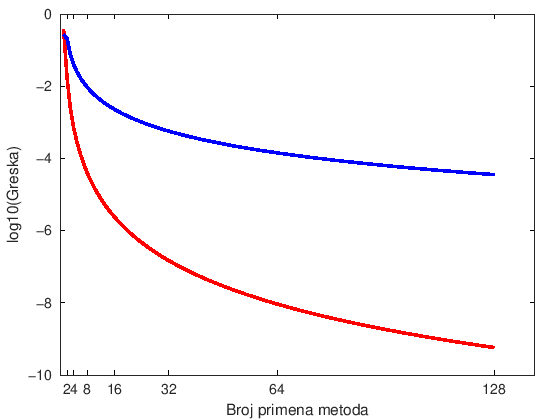

In [46]:
[errors_simpson,sub_intervals_simp]=calculate_error(2,6,@(x)x-cos(2.*x),15.88988521134625,2^7,'simpson_kompozitno');
[errors_trapez,sub_intervals_tr]=calculate_error(2,6,@(x)x-cos(2.*x),15.88988521134625,2^7,'trapez_kompozitno');

plot(1:length(errors_simpson),log10(errors_simpson),"linewidth",10,"color", "red")
hold on;
plot(1:length(errors_trapez),log10(errors_trapez),"linewidth",10,"color", "blue")
xlabel('Broj primena metoda');
ylabel('log10(Greska)');
xticks=[];
for i=1:8
    xticks(i)=2^i;
end
set(gca, 'xtick', xticks)
set(gca, "fontsize", 14)

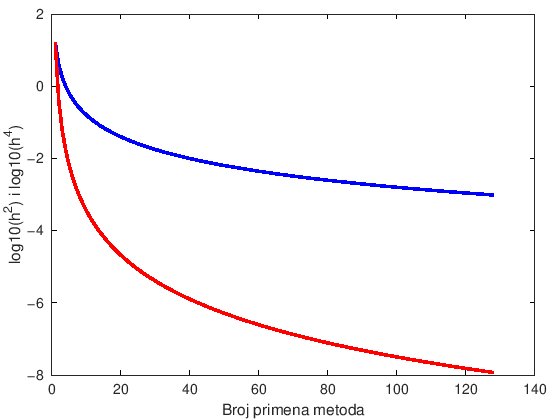

In [47]:
plot(1:length(sub_intervals_tr),log10(sub_intervals_tr.^2),"linewidth",10,"color","blue")
hold on;
plot(1:length(sub_intervals_simp),log10(sub_intervals_simp.^4),"linewidth",10,"color", "red")
xlabel('Broj primena metoda');
ylabel('log10(h^2) i log10(h^4)');
set(gca, "fontsize", 14)

#### Do sada smo videli da Njutn-Kotesove metode bolje rezultate mogu da postignu: (1) povećanjem kompleksnosti metode (stepena interpolacinog polinoma) ili (2) podelom intervala na veći broj pod-intervala.
#### Oba načina povećavaju računsku složenost numeričke integracije. U nastavku zato pokazujemo jednu od alternativa.

## Rombergov metod

#### Pre nego što objasnimo Rombergov metod pogledaćemo sledeći kod:

In [50]:
I_simpson_kom = simpson_kompozitno(2,6,@(x)2.^x,1)
I_trapez_kom_1 = trapez_kompozitno(2,6,@(x)2.^x,1)
I_trapez_kom_2 = trapez_kompozitno(2,6,@(x)2.^x,2)
(4*I_trapez_kom_2-I_trapez_kom_1)/3

I_simpson_kom =  88
I_trapez_kom_1 =  136
I_trapez_kom_2 =  100
ans =  88


#### Vidimo da smo pomoću dve upotrebe metode trapeza (za 1 i 2 trapeza) dobili isti rezultat kao da smo upotrebili Smpsonova 1/3 metodu za ceo interval.
#### Dakle, dobili smo rezultat Smpsonove 1/3 bez da upošte znamo formulu ili implementaciju te metode. To je veoma značajan rezultat!
#### Sve što smo uradili je *(4*I_trapez_kom_2-I_trapez_kom_1)/3*. Postavlja se pitanje kako smo znali koje računske operacije da upotrebimo?
#### Upravo to je rezultat Rombergove metode. Ona nam pruža način da kombinujemo rezultate metoda manje kompleksnosti na takav način da dobijemo rezultate metoda veće kompleksnosti.
#### Objasnićemo sada na koji način smo došli do fromule za kombinovanje metoda manje kompleksnosti.
#### Recimo da imamo neki numerički metod za integraciju, npr. metod trapeza koji ćemo označiti sa $R_{1,1}$. Kod $R_{i,j}$ sa $i$ ozаčnavamo finoću podele, a sa $j$ kvalitet (kompleksnost metoda). Na primer, $R_{1,1}$ je jedna primena metode trapeza, $R_{2,1}$ su dve primene metode trapeza, a $R_{1,2}$ je jedna primena Simposonovog 1/3 metoda itd.
#### Dakle, dati numerički metod za integraciju $R_{1,1}$ se od tačne vrednosti integrala $I$ razlikuje za grešku $E_{1,1}$ koja je reda $O(h^2)$:
#### $$I=R_{1,1}+E_{1,1}$$
#### U ovom slučaju kada kažemo da je greška reda $O(h^2)$ mislimo na to da je najveći faktor greške (u odnosu na koga su svi ostali zanemarljivo mali) je proprocionalan (ponaša se slično kao) $h^2$.
#### Objasnićemo na šta se misli pomoću primera Tejlorovog reda:
#### $$f(x)=f(x_0)+f'(x_0)h+\frac{1}{2}f''(x_0)h^2+O(h^3)$$, gde je $h=x-x_0$. 
#### Iz definicije Tejlorovog reda znamo da sa $O(h^3)$ nismo označili samo jedan element koji je preostao u redu nego da se za jako male vrednosti $h$ sve što je preostalo ponaša kao $h^3$, tj. da je taj sa sabirak uz $h^3$ najveći faktor greške ako koristimo samo prva tri člana reda da aproksimiramo funkciju u okolini tačke $x_0$. To znači da greška ima sledeći oblik:
#### $$f(x)=f(x_0)+f'(x_0)h+\frac{1}{2}f''(x_0)h^2+Ah^3+Bh^4+Ch^5+...$$
#### , gde su $A$,$B$,$C$ neke konstante, a mi mi zanemarujemo delove $+Bh^4+Ch^5+...$ i posmatramo samo najveći faktor $Ah^3$.
#### Kod Njutn-Kotesovih formula imamo istu situaciju samo su stepeni faktora greške uvek parni (za detalje pogledati udžbenik). Na primer, za metod trapeza važi:
#### $$I=R_{1,1}+Ah^2+Bh^4+Ch^6+...$$, a za Simpsonov 1/3 metod važi:
#### $$I=R_{1,2}+Ah^4+Bh^6+...$$ ($A$,$B$,$C$... su konstante i nisu iste u slučaju metoda trapeza i Simpsonovog 1/3 metoda).
#### Pokazujemo sada na koji način se izvodi formula za Rombergov metod.
#### Uzimamo dve primene metode trapeza, za ceo veličinu pod-intervala $h$, $\frac{1}{2}h$. Označićemo ih sa $R_{1,1}$ i $R_{2,1}$, a njihove najveće faktore grešaka (sabirak sa $h^2$) sa  $E_{1,1}$ i $E_{2,1}$.
#### U nastavku pokušavamo nekako da iskombinujemo $R_{1,1}$ i $R_{2,1}$ tako da uklonimo $E_{1,1}$ i $E_{2,1}$.
#### Ključna stvar koja će nam to omogućiti je to što znamo da važi da je:
#### $$E_{2,1}=\frac{1}{4}E_{1,1}$$
#### Ranije smo pokazali kada prepolovimo veličinu pod-intervala, greška metode trapeza se smanji 4 puta.
#### Posmatrajmo sada sledeće izvođenje:

#### $$I=R_{1,1}+E_{1,1}$$
#### $$I=R_{2,1}+E_{2,1}$$
#### $$E_{2,1}=\frac{1}{4}E_{1,1}$$
#### $$I=R_{1,1}+E_{1,1}$$
#### $$I=R_{2,1}+\frac{1}{4}E_{1,1}$$
#### $$R_{1,1}-R_{2,1}=-\frac{3}{4}E_{1,1}$$
#### $$E_{1,1}=\frac{4(R_{2,1}-R_{1,1})}{3}$$
#### $$I=R_{1,1}+E_{1,1}=R_{1,1}+\frac{4(R_{2,1}-R_{1,1})}{3}$$
#### $$I=\frac{4R_{2,1}-R_{1,1}}{3}$$

#### Vidimo da smo uspeli da uklonimo $E_{1,1}$ i $E_{2,1}$. Da li smo time uklonili svu grešku?
#### Nismo, ukloni smo samo najveći faktor. Prvi sledeći faktor je reda $O(h^4)$, odnosno rezultat koji smo dobili je u stvari rezultat Simpsonovog 1/3 metoda.
#### Implementiraćemo sada funkciju koja je primenti formulu koju smo upravo izveli.

In [51]:
function I=romberg(a,b,fun,n)
    A=zeros(n,n);
    for i=1:n
        A(i,1)=trapez_kompozitno(a,b,fun,2^(i-1));
    end
    A
    for j=2:n
        for i=1:(n-j+1)
            A(i,j)=(4*A(i+1,j-1)-A(i,j-1))/3;
        end
    end
    A
endfunction

In [52]:
romberg(2,6,@(x)2.^x,3)

A =

   136     0     0
   100     0     0
    90     0     0

A =

   136.00000    88.00000    86.22222
   100.00000    86.66667     0.00000
    90.00000     0.00000     0.00000



In [81]:
I_simpson_kom = simpson_kompozitno(2,6,@(x)2.^x,2)

I_simpson_kom =  86.667


#### Šta bi se dogodilo kada bi smo u prethodnom izvođenju koristili Simpsonov 1/3 metod umesto metoda trapeza:
#### $$I=R_{1,2}+E_{1,2}$$
#### $$I=R_{2,2}+E_{2,2}$$
#### $$E_{2,2}=\frac{1}{16}E_{1,2}$$
#### $$R_{1,2}-R_{2,2}=-\frac{15}{16}E_{1,2}$$
#### $$E_{1,2}=\frac{16(R_{2,2}-R_{1,2})}{15}$$
#### $$I=R_{1,2}+E_{1,2}=R_{1,2}+\frac{16(R_{2,2}-R_{1,2})}{15}$$
#### $$I=\frac{16R_{2,2}-R_{1,2}}{15}$$
#### Dakle, ako sa u $R_{i,j}$ sa $i$ ozаčnimo finoću podele, a sa $j$ kvalitet (kompleksnost metoda) vidimo da je šablon za Rombergov da se $R_{i+1,j}$ množi sa $4^j$, a deli se sa $4^j-1$, odnosno:
#### $$R_{i,j+1}=\frac{4^jR_{i+1,j}-R_{i,j}}{4^j-1}$$
#### Implementiramo sada šablon koji smo izveli. Funkcija koju dobijamo proizvoljan broj puta primenjuje formulu iz prethodnog reda. Tačnost do koje hoćemo da idemo unosi se kao broj kolona matrice, odnosno $n$.
#### Najbolji rezultat koji imamo je poslednji element prve vrste, pa njega vraćamo.

In [53]:
function I=romberg(a,b,fun,n)
    A=zeros(n,n);
    for i=1:n
        A(i,1)=trapez_kompozitno(a,b,fun,2^(i-1));
    end
    for j=2:n
        for i=1:(n-j+1)
            A(i,j)=(4^(j-1)*A(i+1,j-1)-A(i,j-1))/(4^(j-1)-1);%smanjujemo j za 1 jer idemo od druge kolone, a red metoda koji nam treba je 1
        end
    end
    A
    I=A(1,n);
endfunction

In [54]:
I_romberg=romberg(2,6,@(x)2.^x,5)

A =

   136.00000    88.00000    86.57778    86.56175    86.56170
   100.00000    86.66667    86.56200    86.56170     0.00000
    90.00000    86.56854    86.56171     0.00000     0.00000
    87.42641    86.56213     0.00000     0.00000     0.00000
    86.77820     0.00000     0.00000     0.00000     0.00000

I_romberg =  86.562


In [55]:
tacno_resenje = 86.56170
abs(tacno_resenje-I_romberg )<=10^-5

tacno_resenje =  86.562
ans = 1


#### Vidimo da smo uspeli da dobijemo tačno rešenje iako smo od metoda za numeričku integraciju koristili samo metod trapeza i to za $2^4=16$ primena.
#### Pogledaćemo sada koliko bi nam otrpilike trebalo primena metode trapeza da bi dobili tačno rešenje.

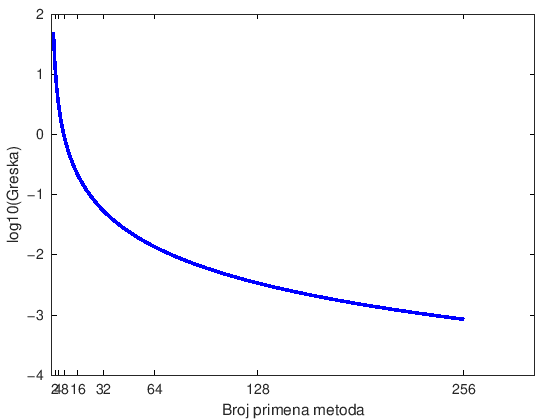

In [56]:
errors_trapez=calculate_error(2,6,@(x)2.^x,86.56170,2^8,'trapez_kompozitno');

plot(1:length(errors_trapez),log10(errors_trapez),"linewidth",10,"color", "blue")
xlabel('Broj primena metoda');
ylabel('log10(Greska)');
xticks=[];
for i=1:8
    xticks(i)=2^i;
end
set(gca, 'xtick', xticks)
set(gca, "fontsize", 14)

In [57]:
I_trapez_kom=trapez_kompozitno(2,6,@(x)2.^x,2^12)

I_trapez_kom =  86.562


In [58]:
abs(tacno_resenje-I_trapez_kom)<=10^-5

ans = 1


#### Dakle bez Rombergove metode trebalo bi negde oko $2^{11}$ primena da dobijemo tačno rešenje, što možemo da vidimo na grafiku iznad.
#### Takođe smo sa Rombergovom metodom postigli rezultat metode koja ima tačnost reda $O(h^{10})$ bez poznavanja formule ili implementacije metode tako velikog reda tačnosti.

## Gausova kvdaratura
#### Recimo da izračunavamo integral fukcije ispod na intervalu [-1,1].

fun =

@(x) 3 .* x .^ 3 - 4 .* x .^ 2 + 2 .* x + 20



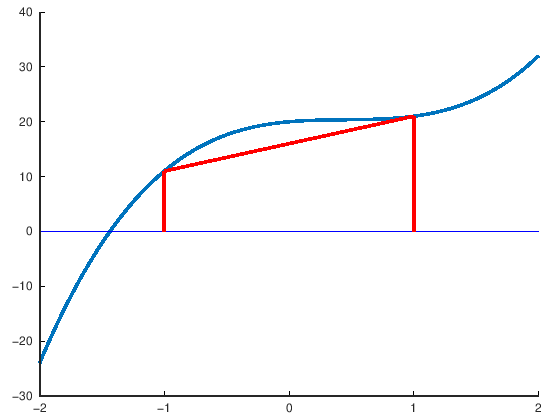

In [88]:
fun=@(x)3.*x.^3-4.*x.^2+2.*x+20
draw_trapezoids(-1,1,fun,1)

#### Koristimo jednu primenu metode trapeza:

In [89]:
I_trapez_1=trapez_kompozitno(-1,1,fun,1)
a=-1;b=1;
I_trapez_1_rucno=(b-a)/2*fun(a)+(b-a)/2*fun(b)

I_trapez_1 =  32
I_trapez_1_rucno =  32


#### Metoda trapeza uvek koristi krajnje tačke $(a,f(a))$ i $(b,f(b))$ i množi ih vrednošću $(b-a)/2$.
#### Šta bi bilo ako bi odabrali neke druge tačke i pomnožili ih nekom drugom vrednošću?

In [90]:
x1=-0.577350269;
x2=0.577350269;
c1=1;
c2=1;
I_gq=c1*fun(x1)+c2*fun(x2)

I_gq =  37.333


In [91]:
tacno_resenje=112/3

tacno_resenje =  37.333


#### Na koji način smo znali koje tačke i koje koeficijente da upotrebimo da upotrebimo da bi dobili tačno rešenje?
#### To je rezultat Gausove kvadrature.
#### Cilj Gausove kvadarature je da postigne veći nivo tačnosti bez povećanja kompleksnosti metode.
#### Drugim rečima, hoćemo da uzmemo vrednosti funkcije u dve tačke $x_1$ i $x_2$ i da ih pomnožimo sa neka dva koeficijenta $c_1$ i $c_2$, ali tako da dobijemo veću tačnost od metode trapeza. 
#### Kod metode trapeza je $x_1=a$, $x_2=b$, $c_1=\frac{b-a}{2}$ i $c_2=\frac{b-a}{2}$.
### Postupak određivanja tačaka i koeficijenata
#### Pošto imamo 4 nepoznate koje treba da odredimo ($x_1,x_2,c_1,c_2$) trebalo bi na neki način da smislimo 4 uslova (jednačine) koje ti koeficijenti treba da zadovolje.
#### Zhatevaćemo da te 4 vrednosti budu takve da linearna kombinacija:
#### $$c_1f(x_1)+c_2f(x_2)$$
#### ima isti rezultat kao analitičko rešenje integrala bilo kog polinoma trećeg stepena na intervalu $[a,b]$ gde su $x_1$ i $x_2$ tačke iz tog intervala. Dakle, želimo da postignemo da za blio koji polinom:
#### $$f(x)=a_1x^3+a_2x^2+a_3x+a_4$$ važi:
#### $$\int_{a}^{b}(a_1x^3+a_2x^2+a_3x+a_4)dx=c_1f(x_1)+c_2f(x_2)$$
#### $$c_1f(x_1)+c_2f(x_2)=c_1(a_1x_1^3+a_2x_1^2+a_3x_1+a_4)+c_2(a_1x_2^3+a_2x_2^2+a_3x_2+a_4)=\\a_1(c_1x_1^3+c_2x_2^3)+a_2(c_1x_1^2+c_2x_2^2)+a_3(c_1x_1+c_2x_2)+a_4(c_1+c_2)$$
#### $$\int_{a}^{b}(a_1x^3+a_2x^2+a_3x+a_4)dx=a_1\frac{b^4-a^4}{4}+a_2\frac{b^3-a^3}{3}+a_3\frac{b^2-a^2}{2}+a_4(b-a)$$
#### $$a_1\frac{b^4-a^4}{4}+a_2\frac{b^3-a^3}{3}+a_3\frac{b^2-a^2}{2}+a_4(b-a)=\\a_1(c_1x_1^3+c_2x_2^3)+a_2(c_1x_1^2+c_2x_2^2)+a_3(c_1x_1+c_2x_2)+a_4(c_1+c_2)$$
#### Dobijamo sledeći nelinearan sistem:
#### $$c_1x_1^3+c_2x_2^3=\frac{b^4-a^4}{4} \hspace{20 mm} c_1x_1^2+c_2x_2^2=\frac{b^3-a^3}{3}\\c_1x_1+c_2x_2=\frac{b^2-a^2}{2} \hspace{20 mm} c_1+c_2=b-a$$
#### Sistem ima analitičko rešenje oblika:
#### $$x_1=\frac{b-a}{2}(-\frac{1}{\sqrt{3}})+\frac{a+b}{2} \hspace{20 mm} x_2=\frac{b-a}{2}(\frac{1}{\sqrt{3}})+\frac{a+b}{2}$$
#### $$c_1=\frac{b-a}{2} \hspace{20 mm} c_2=\frac{b-a}{2}$$
#### Gausova kvadratura se tipično koristi na sledeći način.
#### 1.Imamo unapred izračunate vrednosti tačaka i koeficijenata za interval $[-1,1]$ koje se mogu pronaći u literturi ili na internetu.
#### 2.Integral koji rešavamo na intervalu $[a,b]$ svodimo na $[-1,1]$ uvođenjem linearnog mapiranja (koje pokazujemo u nastavku).
#### 3.Koristimo tačake i koeficijenate za interval $[-1,1]$ da rešimo integral.
#### Kokretno za dve tačke, vrednosti tačaka i koeficijenata za interval $[-1,1]$ su:
#### $$x_1=-0.577350269 \hspace{20 mm} x_2=0.577350269 \hspace{20 mm}\\c_1=1 \hspace{20 mm} c_2=1$$
#### Kao malu vežbu, možemo ih dobiti kao rešenje sledećeg sistema:
#### $$c_1x_1^3+c_2x_2^3=0 \hspace{20 mm} c_1x_1^2+c_2x_2^2=\frac{2}{3}\\c_1x_1+c_2x_2=0 \hspace{20 mm} c_1+c_2=2$$
#### Koristimo Octave funkciju fsolve.

In [92]:
function y=f(x) %x(1) je x1, x(2) je x2,x(3) je c1,x(4) je c2
  y(1) = x(3)*x(1)^3+x(4)*x(2)^3;
  y(2) = x(3)*x(1)^2+x(4)*x(2)^2-2/3;
  y(3) = x(3)*x(1)   +x(4)*x(2);
  y(4) = x(3)         +x(4)-2;
endfunction
[x, fval, info] = fsolve (@f, [-1;1;0;0])

    fsolve>__dogleg__ at line 532 column 5
    fsolve at line 351 column 11
x =

  -0.57735
   0.57735
   1.00000
   1.00000

fval =

   0.0000000000001   0.0000000018841   0.0000000000000   0.0000000000000

info =  1


#### Kao primer upotrebe gausove kvadrature prvo rešavamo integral funkcije:
#### $$I=\int_{-1}^{1}2^xdx$$

In [93]:
tacno_resenje=3/(2*log(2))

tacno_resenje =  2.1640


In [94]:
fun=2.^(x);
x1=-0.577350269;
x2=0.577350269;
c1=1;
c2=1;
I_gq=c1*2^x1+c2*2^x2

I_gq =  2.1623


In [95]:
I_trapez_1=trapez_kompozitno(-1,1,@(x)2.^x,1)

I_trapez_1 =  2.5000


#### Sada koristimo istu podintegralnu funkciju, ali menjamo interval:
#### $$I=\int_{2}^{6}2^xdx$$
#### To znači da sada moramo $x$ koji je intervalu $[2,6]$ da prebacimo na neko $t$ koje će biti u intervalu $[-1,1]$.
#### Pokazaćemo kako možemo da mapiramo proizvoljan interval $[a,b]$ na interval $[-1,1]$. Mapiranje radimo pomoću prave koja prolazi kroz tačke $(a,-1), (b,1)$.
#### Formiramo pravu, tj. Lagranžov interpolacioni polinom za $(a,-1), (b,1)$:
#### $$t=(-1)\frac{x-b}{a-b}+(1)\frac{x-a}{b-a}=\frac{b-x}{a-b}+\frac{x-a}{b-a}=\frac{x-b}{b-a}+\frac{x-a}{b-a}=\frac{2}{b-a}x-\frac{a+b}{b-a}$$
#### $$t=\frac{2}{b-a}x-\frac{a+b}{b-a} \implies t+\frac{a+b}{b-a}=\frac{2}{b-a}x \implies x=\frac{b-a}{2}t+\frac{a+b}{2}$$
#### Ako prethodnu jednakost (smenu) za $x$ u integralu:
#### $$I=\int_{a}^{b}f(x)dx$$
#### onda podintegralna funkcija ima novu nezavisnu promenljivu $t$ koja je u rasponu $[-1,1]$.
#### Moramo da zamenimo $dx$ pa računamo izvod naše smene:
#### $$ x=\frac{b-a}{2}t+\frac{a+b}{2} \implies dx=\frac{b-a}{2}dt$$
#### Uvodimo sada smenu u integral:
#### $$I=\int_{a}^{b}f(x)dx=\int_{-1}^{1}f(\frac{b-a}{2}t+\frac{a+b}{2})\frac{b-a}{2}dt$$
#### U kodu ispod testiramo i crtamo smenu za $(2,-1), (b,6)$:

In [96]:
p=linterp([2,6],[-1,1])

p =

   0.50000  -2.00000



In [97]:
polyval(p,2)
polyval(p,6)

ans = -1
ans =  1


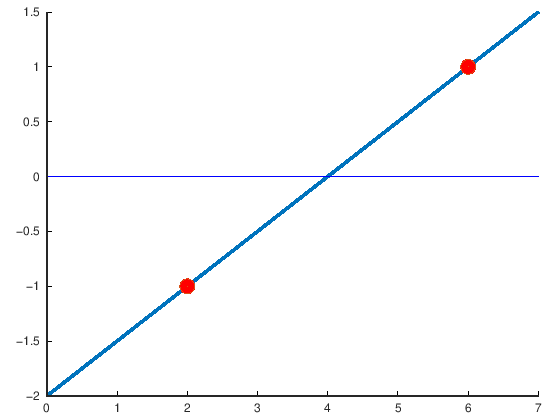

In [98]:
plot_function([0,7],@(x)0.5.*x-2)
plot([2,6],[-1,1],'o','markersize', 14,'markerfacecolor','r')

#### Rešavamo sada sledeći integral pomoću Gausove kvadrature:
#### $$I=\int_{2}^{6}2^xdx$$
#### $$I=\int_{2}^{6}2^xdx=\int_{-1}^{1}2^{\frac{6-2}{2}t+\frac{6+2}{2}}\frac{6-2}{2}dt=\int_{-1}^{1}2^{2t+4}2dt=\int_{-1}^{1}2^{2t+5}dt$$
#### Sada korisimo:
#### $$f(t)=2^{2t+5} \hspace{20 mm} t_1=-0.577350269 \hspace{20 mm} t_2=0.577350269 \hspace{20 mm} \hspace{20 mm} c_1=1 \hspace{20 mm} c_2=1$$ 
#### i izračunavamo:
#### $$I=c_1f(t_1)+c_2f(t_2)=2^{2 \cdot -0.577350269+5}+2^{2 \cdot 0.577350269+5}$$

In [99]:
I_gq=2^(2*-0.577350269+5)+2^(2*0.577350269+5)

I_gq =  85.617


In [100]:
I_trapez_1=trapez_kompozitno(2,6,@(x)2.^x,1)

I_trapez_1 =  136


In [101]:
tacno_resenje = 86.56170

tacno_resenje =  86.562


In [102]:
greska_gq=abs(I_gq-tacno_resenje)/tacno_resenje
greska_I_trapez_1=abs(I_trapez_1-tacno_resenje)/tacno_resenje

greska_gq =  0.010910
greska_I_trapez_1 =  0.57113


#### Iz rezultata se vidi da Gausova kvadratura za dve tačke ima značajno manju grešku od metode trapeza.
#### U nastavku dat je kod za Gausovu kvadraturu za dve tačke za proizvoljan interval $[a,b]$.

In [103]:
function I=gauss_quad(a,b,fun,n)
    x=[-0.577350269,0.577350269];
    c=[1,1];
    map_fun=(b-a)/2.*x+(a+b)/2;
    map_dx=(b-a)/2;
    feval(fun,map_fun);
    I=sum(c.*feval(fun,map_fun).*map_dx); 
endfunction

In [104]:
I_gauss_quad_1=gauss_quad(2,6,@(x)2.^x,2)

I_gauss_quad_1 =  85.617


In [105]:
I_trapez_1=trapez_kompozitno(2,6,@(x)2.^x,1)

I_trapez_1 =  136


#### Za kraj samo napomena da se Gausova kvadratura može koristiti i za veći broj tačka od dve. Tačke i koeficijenti se izvode tako da njihova linearna kombinacija daje tačan rezultat za integrale: petog, sedmog, devetog... stepena.
#### Kao i u slučaju dve tačke, u literaturi i na internetu dosupne su tabele sa vrednostima i sve što je potrebno je uvesti smenu koja će prebaci intregal na interval $[-1,1]$.